<a href="https://colab.research.google.com/github/Archillesjakins/Lottery-Prediction-LLM-Fine-tuning/blob/main/Lottery_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

# Gemini API: Model tuning with Python

In [38]:
import google.generativeai as genai

In [39]:
from google.colab import userdata
genai.configure(api_key='API_KEY')
model = genai.GenerativeModel("gemini-1.5-pro")


You can check you existing tuned models with the `genai.list_tuned_model` method.

In [40]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-3424
tunedModels/generate-num-1664
tunedModels/generate-num-68
tunedModels/generate-num-612
tunedModels/generate-num-6983


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [41]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "pro" in m.name][0]
base_model

Model(name='models/gemini-1.0-pro-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro 001 (Tuning)',
      description=('The original Gemini 1.0 Pro model version that supports tuning. Gemini 1.0 '
                   'Pro will be discontinued on February 15th, 2025. Move to a newer Gemini '
                   'version.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=0.9,
      max_temperature=None,
      top_p=1.0,
      top_k=None)

In [42]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data = [
    {
        'text_input': '50 36 3 38 17 9 30 12 17 34 36 4 20 41 15 34 49 24 10 39 34 25 38 44 35 20 36 15 14 27',
        'output': '10 23 22 15 5',
    },
    {
        'text_input': '9 38 24 11 42 37 8 28 20 48 38 31 49 20 48 36 40 38 18 11 23 7 42 1 49 23 24 40 24 18',
        'output': '45 38 43 10 50',
    },
    {
        'text_input': '12 10 11 42 19 14 40 44 45 3 23 14 48 31 39 21 4 4 20 29 25 43 17 48 31 26 28 15 13 43',
        'output': '45 41 40 24 47',
    },
    {
        'text_input': '18 34 20 37 23 35 9 21 32 37 9 10 15 2 43 13 35 39 30 38 5 5 24 32 10 17 31 15 24 50',
        'output': '28 12 3 14 46',
    },
    {
        'text_input': '21 49 36 26 24 13 38 19 4 48 27 5 2 38 7 41 15 49 26 10 47 43 34 4 31 19 39 22 9 26',
        'output': '4 47 16 14 44',
    },
    {
        'text_input': '47 28 48 31 35 12 22 41 10 18 39 40 33 2 41 32 11 27 33 45 15 38 17 6 4 18 9 11 46 36',
        'output': '26 29 48 9 5',
    },
    {
        'text_input': '38 46 46 38 18 26 45 26 25 19 19 36 50 44 48 37 40 28 44 16 5 43 11 25 20 29 46 36 25 13',
        'output': '38 23 39 49 17',
    },
],

    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [43]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-9135',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='',
           description='',
           temperature=0.9,
           top_p=1.0,
           top_k=0,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 12, 5, 12, 20, 42, 252117, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 12, 5, 12, 20, 42, 252117, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 12, 5, 12, 20, 43, 212685, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.

In [44]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [45]:
operation.metadata

tuned_model: "tunedModels/generate-num-9135"
total_steps: 175

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [46]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/175 [00:00<?, ?it/s]

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [ ]:
# operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

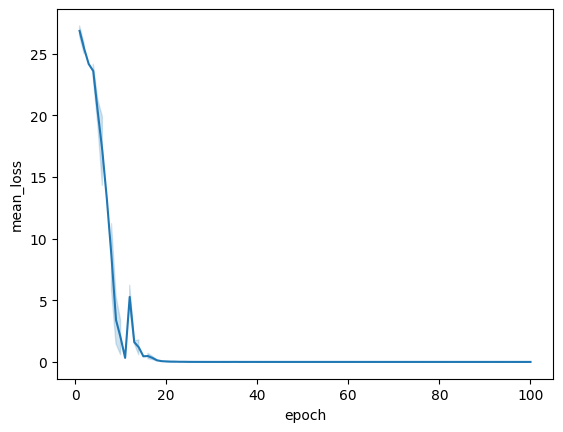

In [47]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [48]:
model = genai.GenerativeModel(model_name=f'tunedModels/generate-num-6983')

In [49]:
result = model.generate_content('38 46 46 38 18 26 45 26 25 19 19 36 50 44 48 37 40 28 44 16 5 43 11 25 20 29 46 36 25 13')
result.text

'4 4 12 42 2'

In [52]:
result = model.generate_content('38 46 46 38 18 26 45 26 25 19 34 36 50 44 48 37 40 45 44 16 5 43 11 22 20 29 46 36 25 13')
result.text

'4 1 12 42'

In [ ]:
result = model.generate_content('38 46 46 38 18 26 45 26 25 19 34 36 50 44 48 37 40 45 44 16 5 43 11 22 20 29 46 36 25 13')
result.text

'IV'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [53]:
genai.update_tuned_model(f'tunedModels/generate-num-6983', {"description":"This is my model."});

In [54]:
model = genai.get_tuned_model(f'tunedModels/generate-num-6983')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists: